In [6]:
import warnings

warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [8]:
train = pd.read_csv('Train Dataset.csv')
test = pd.read_csv('Test Dataset.csv')
submission_df = pd.read_csv('Sample Submission.csv')

In [10]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [ ]:
test.head()

# Heart Disease Prediction - Feature Descriptions

### 1. Chest Pain Type (4 values)
- **Values**: 
  - 1 = Typical Angina
  - 2 = Atypical Angina
  - 3 = Non-Anginal Pain
  - 4 = Asymptomatic

### 2. Resting Blood Pressure
- **Measurement**: Measured in mmHg

### 3. Serum Cholesterol (mg/dl)
- **Measurement**: Amount of cholesterol in the blood

### 4. Fasting Blood Sugar > 120 mg/dl
- **Binary Feature**: 
  - 1 = True
  - 0 = False

### 5. Resting Electrocardiographic Results (Values 0,1,2)
- **Values**: 
  - 0 = Normal
  - 1 = Having ST-T wave abnormality (e.g., T-wave inversions or ST elevation/depression)
  - 2 = Showing probable or definite left ventricular hypertrophy

### 6. Maximum Heart Rate Achieved
- **Measurement**: Beats per minute (bpm)

### 7. Exercise-Induced Angina
- **Binary Feature**: 
  - 1 = Yes
  - 0 = No

### 8. Oldpeak = ST Depression Induced by Exercise Relative to Rest
- **Measurement**: ST depression (in millimeters) compared to rest

### 9. Slope of the Peak Exercise ST Segment
- **Values**: 
  - 1 = Upsloping
  - 2 = Flat
  - 3 = Downsloping

### 10. Number of Major Vessels (0-3) Colored by Fluoroscopy
- **Values**: 0, 1, 2, or 3

### 11. Thal (Thallium Stress Test)
- **Values**: 
  - 0 = Normal
  - 1 = Fixed Defect (scar tissue from a previous heart attack)
  - 2 = Reversible Defect (ischemia that can still be treated)
reatment, making it an important predictor of heart disease.


In [19]:
submission_df.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [21]:
# copy train dataset
df = train.copy()

df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [23]:
print(df.shape, test.shape)

(7303, 15) (2697, 14)


In [25]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,7303.0,15021.535396,2886.026080,10001.0,12521.5,15054.0,17513.5,19998.0
Age,7303.0,53.172669,14.185970,29.0,41.0,53.0,65.0,77.0
Sex,7303.0,0.499658,0.500034,0.0,0.0,0.0,1.0,1.0
cp,7303.0,1.502533,1.115594,0.0,1.0,1.0,3.0,3.0
trestbps,7303.0,147.447487,31.099538,94.0,120.0,148.0,174.0,200.0
chol,7303.0,342.805970,127.291998,126.0,231.0,341.0,450.0,564.0
fbs,7303.0,0.493085,0.499986,0.0,0.0,0.0,1.0,1.0
restecg,7303.0,1.013008,0.815806,0.0,0.0,1.0,2.0,2.0
thalach,7303.0,136.506093,38.141966,71.0,104.0,137.0,170.0,202.0
exang,7303.0,0.503218,0.500024,0.0,0.0,1.0,1.0,1.0


In [27]:
# Check for missing values
df.isna().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
# check for duplicate
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [35]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2697.0,14939.832036,2888.940621,10000.0,12455.0,14854.0,17465.0,19999.0
age,2697.0,53.064516,14.350978,29.0,41.0,53.0,66.0,77.0
sex,2697.0,0.488691,0.499965,0.0,0.0,0.0,1.0,1.0
cp,2697.0,1.504264,1.112747,0.0,1.0,1.0,3.0,3.0
trestbps,2697.0,146.384872,30.640580,94.0,121.0,147.0,172.0,200.0
chol,2697.0,344.027809,127.265038,126.0,233.0,344.0,455.0,564.0
fbs,2697.0,0.497219,0.500085,0.0,0.0,0.0,1.0,1.0
restecg,2697.0,1.021135,0.811590,0.0,0.0,1.0,2.0,2.0
thalach,2697.0,135.993326,38.419913,71.0,103.0,136.0,170.0,202.0
exang,2697.0,0.484613,0.499856,0.0,0.0,0.0,1.0,1.0


In [37]:
df['target'].value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

In [39]:
# Making a list of all catrgorical variables
cat_col = df[['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Sex
0    3654
1    3649
Name: count, dtype: int64
--------------------------------------------------
cp
1    1858
3    1829
2    1814
0    1802
Name: count, dtype: int64
--------------------------------------------------
fbs
0    3702
1    3601
Name: count, dtype: int64
--------------------------------------------------
restecg
2    2478
1    2442
0    2383
Name: count, dtype: int64
--------------------------------------------------
exang
1    3675
0    3628
Name: count, dtype: int64
--------------------------------------------------
slope
0    2470
1    2425
2    2408
Name: count, dtype: int64
--------------------------------------------------
ca
2    1505
4    1488
3    1448
1    1439
0    1423
Name: count, dtype: int64
--------------------------------------------------
thal
1    1879
3    1822
2    1813
0    1789
Name: count, dtype: int64
--------------------------------------------------


In [41]:
# Rename columns
df.rename(columns={'Age': 'age', 
                   'Sex': 'sex'}, inplace=True)

#Drop Id column
df = df.drop('Id', axis=1)

## Univariate Analysis

In [44]:
# Function for histogram and bo

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

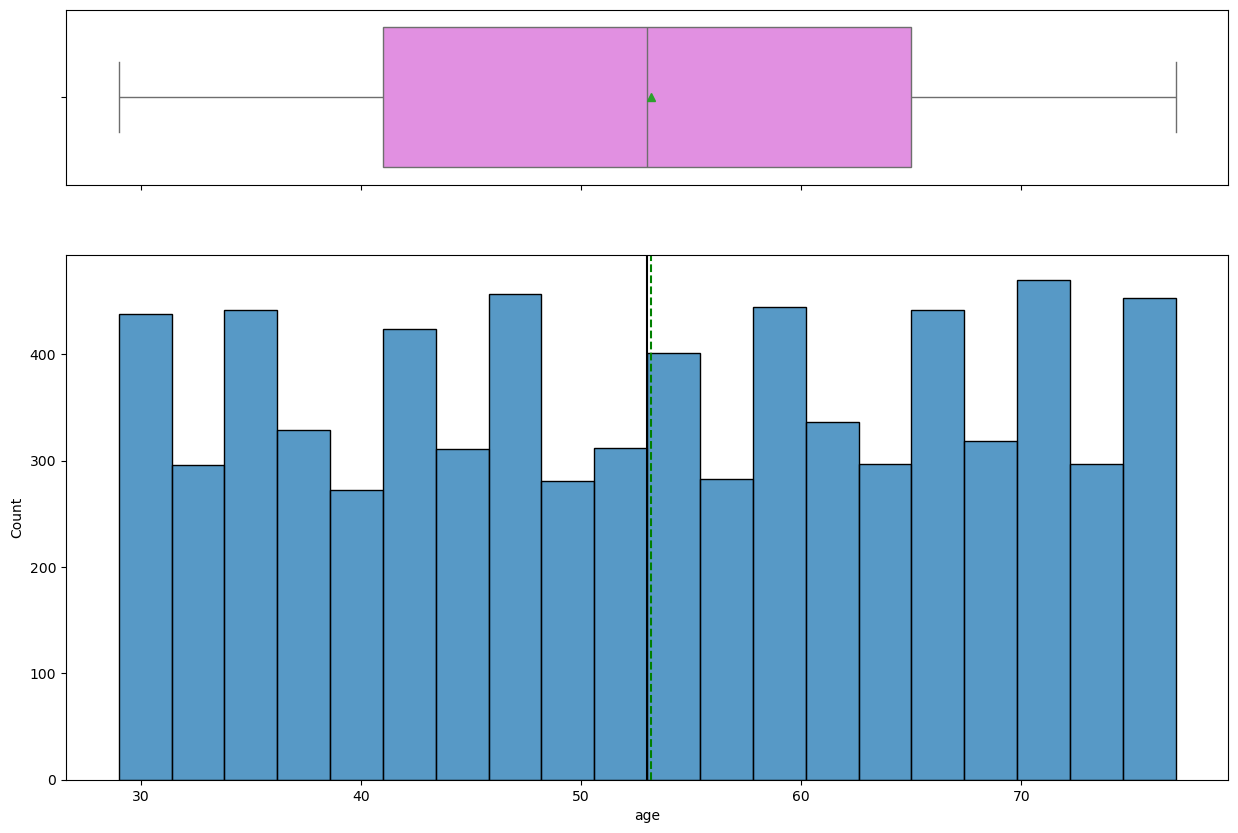

In [46]:
# histogram and boxplot for age
histogram_boxplot(df, 'age')

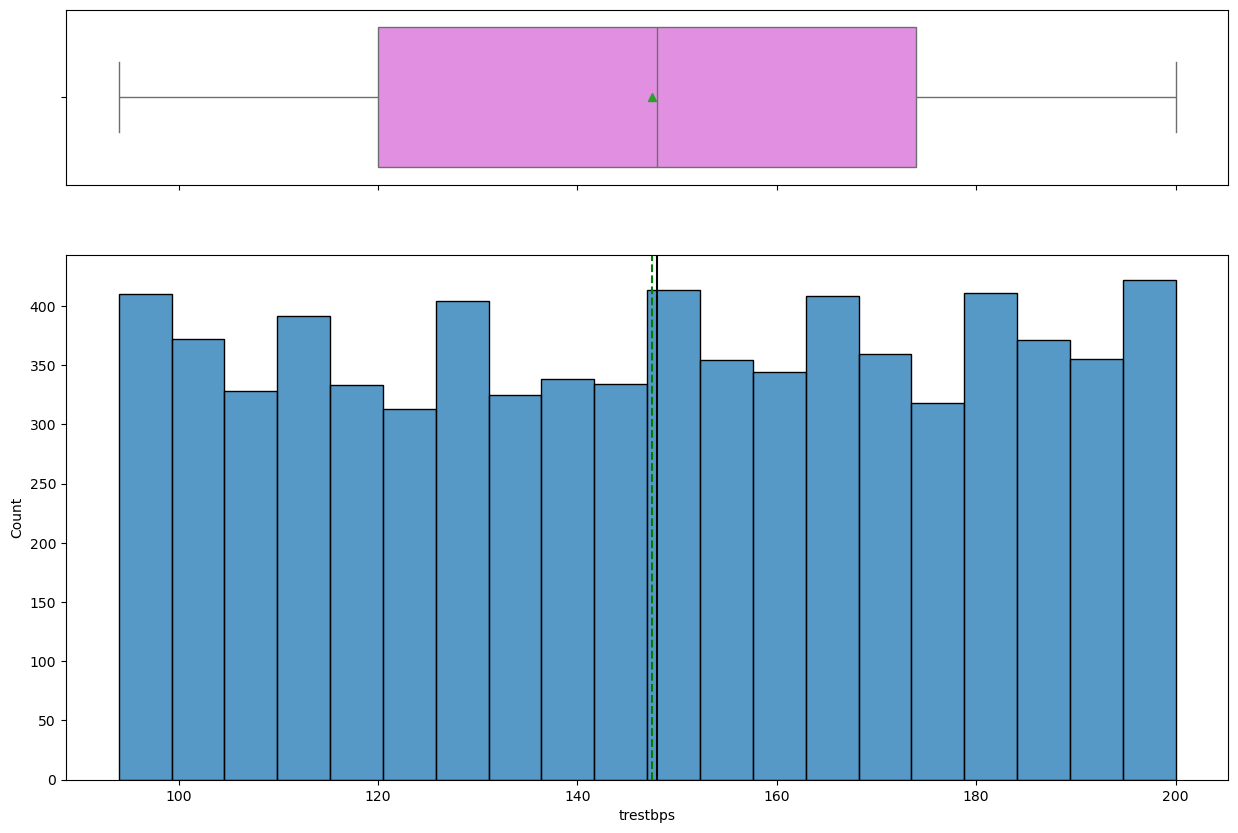

In [48]:
# histogram and boxplot for trestbps
histogram_boxplot(df, 'trestbps')

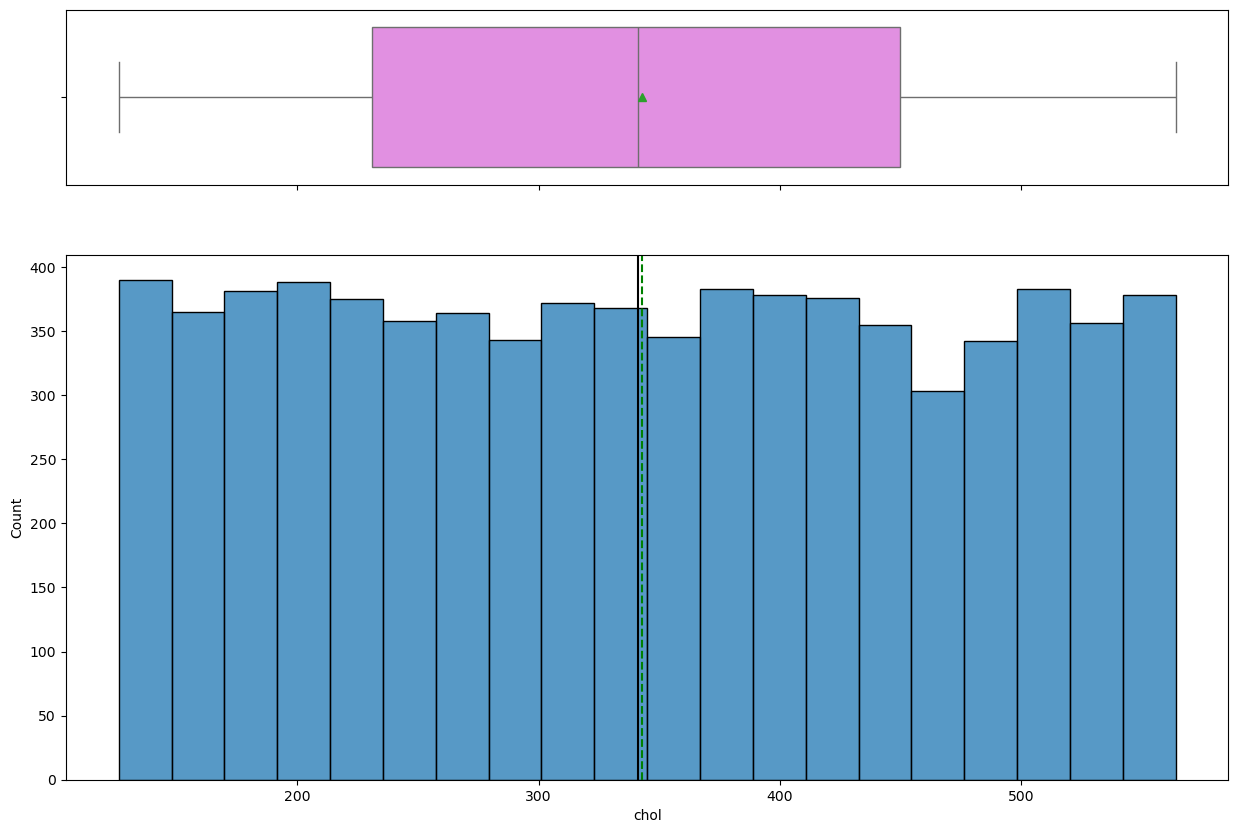

In [49]:
# histogram and boxplot for chol
histogram_boxplot(df, 'chol')

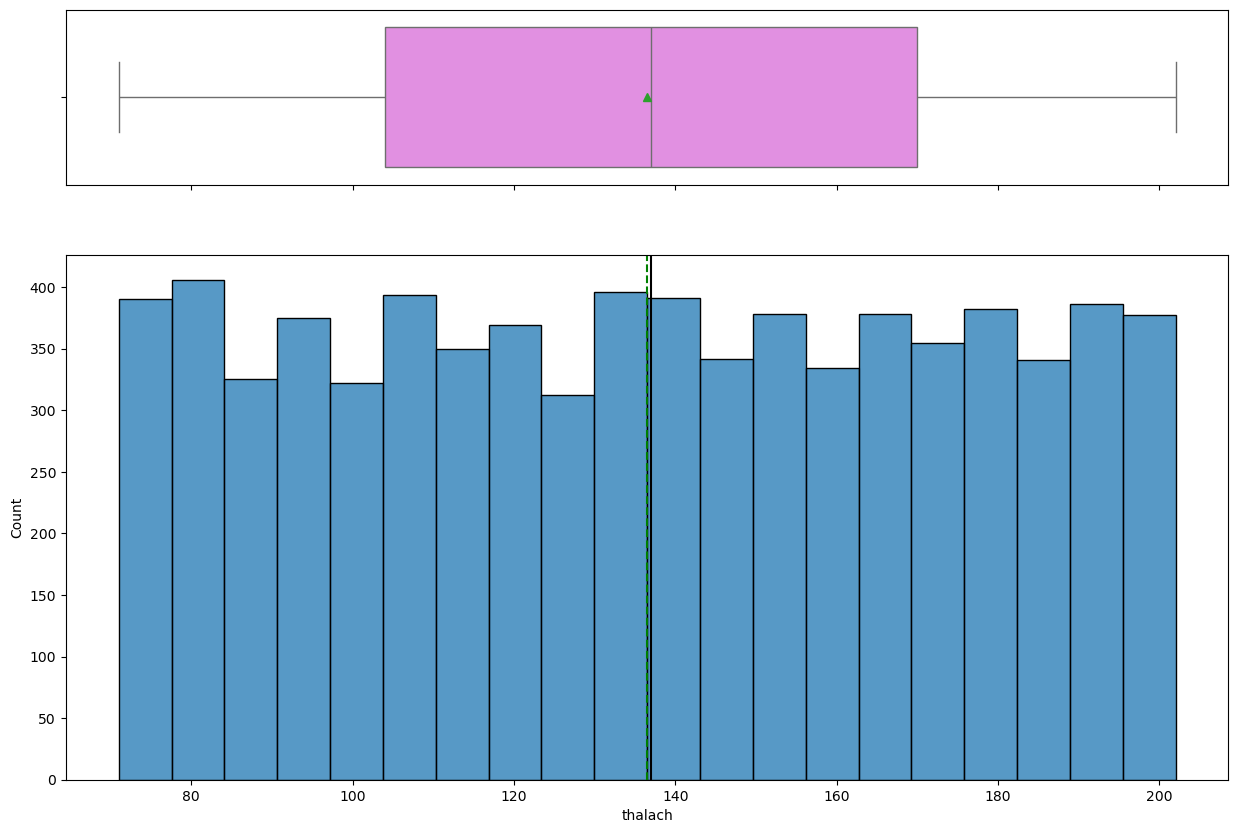

In [51]:
# histogram and boxplot for thalach
histogram_boxplot(df, 'thalach')

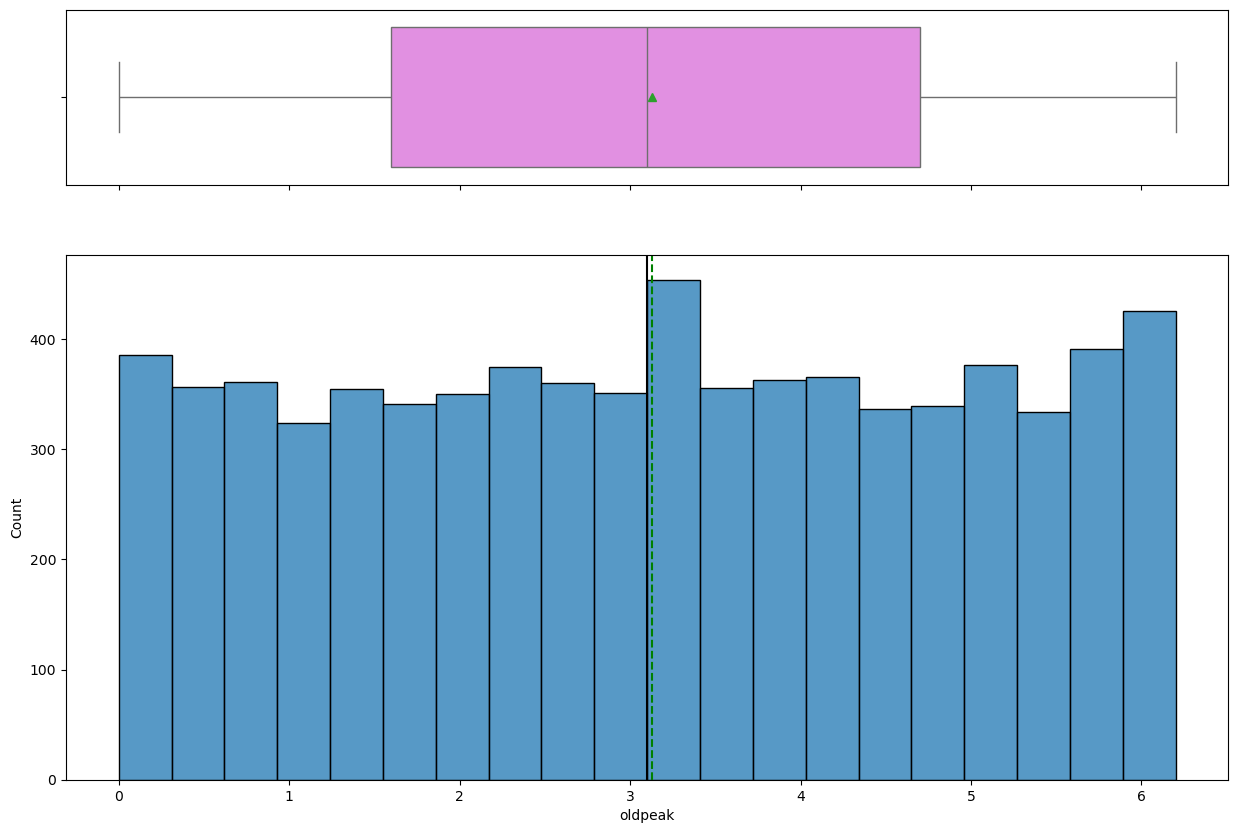

In [61]:
# histogram and boxplot for oldpeak
histogram_boxplot(df, 'oldpeak')

In [63]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

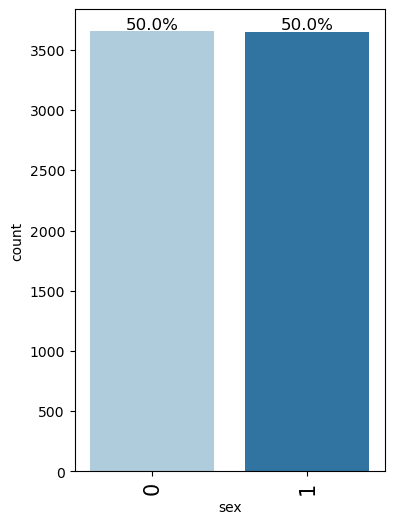

In [65]:
# barplot for sex
labeled_barplot(df, "sex", perc=True) 

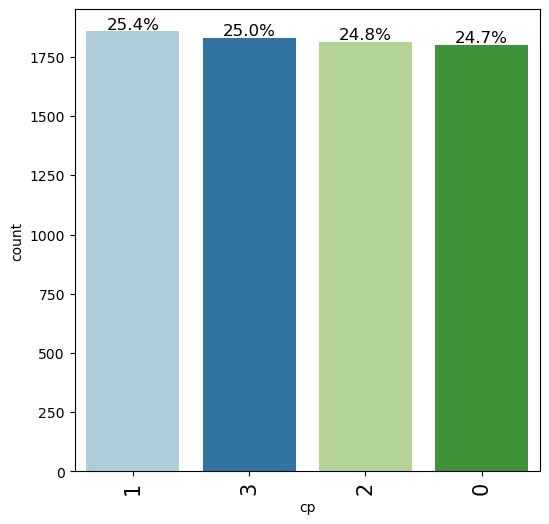

In [67]:
# barplot for cp
labeled_barplot(df, "cp", perc=True) 

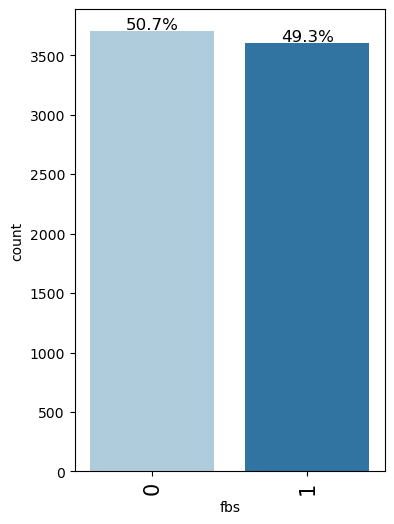

In [69]:
# barplot for fbs
labeled_barplot(df, "fbs", perc=True) 

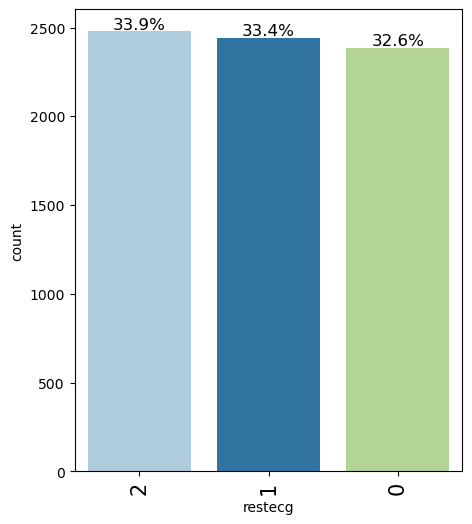

In [71]:
# barplot for restceg
labeled_barplot(df, "restecg", perc=True) 

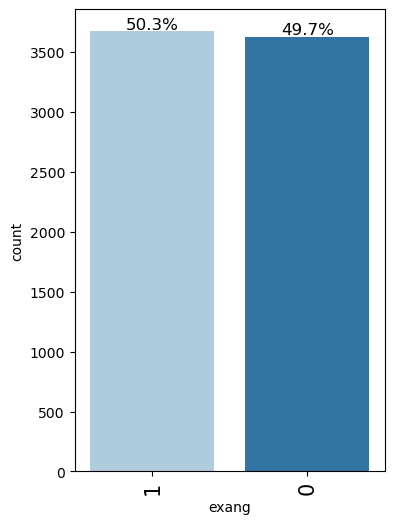

In [73]:
# barplot for exang
labeled_barplot(df, "exang", perc=True) 

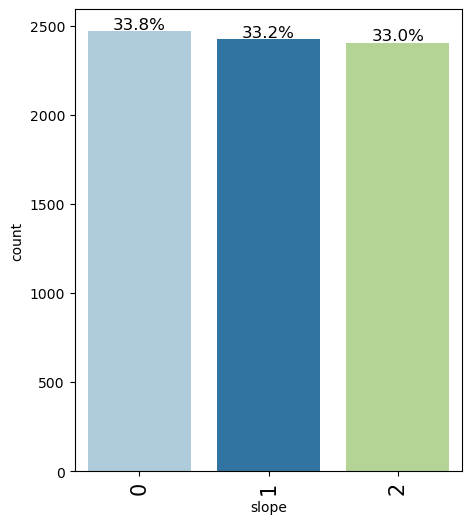

In [75]:
# barplot for slope
labeled_barplot(df, "slope", perc=True) 

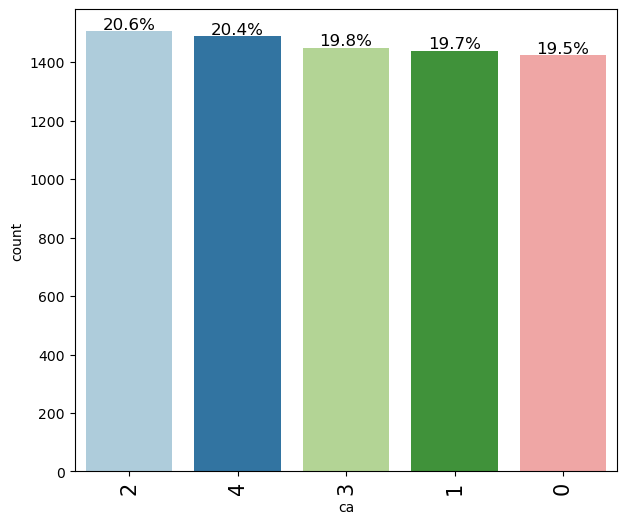

In [77]:
# barplot for ca
labeled_barplot(df, "ca", perc=True) 

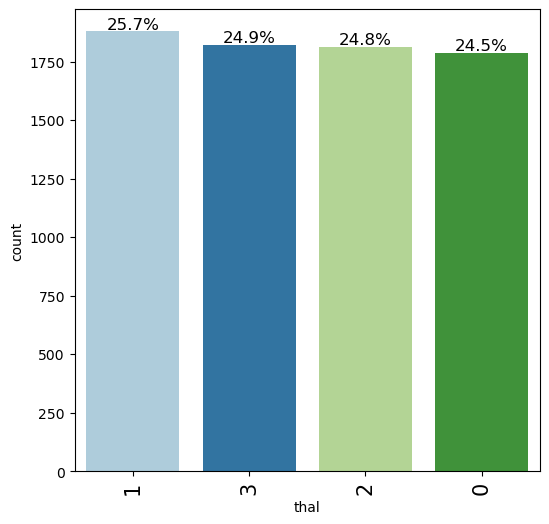

In [79]:
# barplot for thal
labeled_barplot(df, "thal", perc=True) 

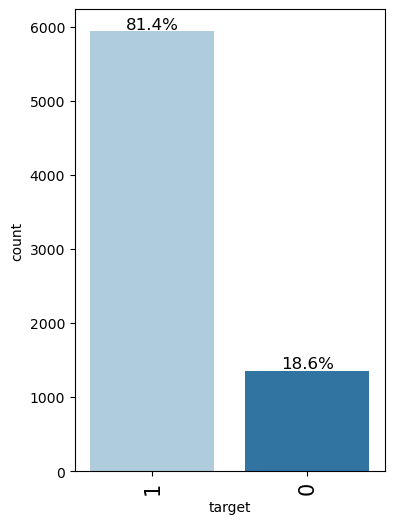

In [81]:
# barplot for target
labeled_barplot(df, "target", perc=True)

<Axes: >

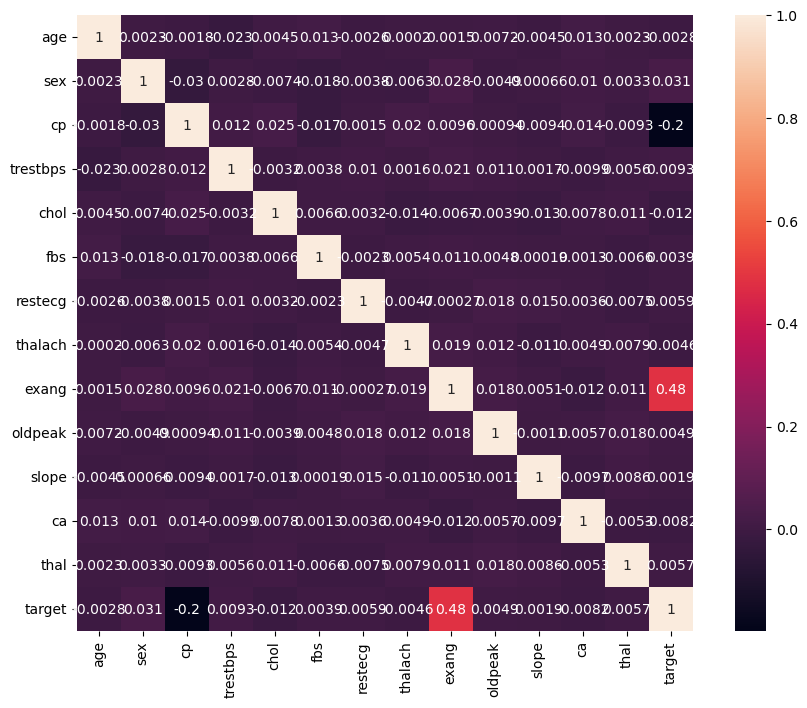

In [83]:
#check correlation
corrmat = df.corr()
f, ax = plt.subplots(figsize=(11,8))
sns.heatmap(corrmat, square=True, annot=True)

## Bivariate Analysis

In [184]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Remove the empty subplot (axs[1, 1])
    fig.delaxes(axs[1, 1])

    plt.tight_layout()
    plt.show()



In [88]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

target     0     1   All
sex                     
All     1362  5941  7303
0        725  2929  3654
1        637  3012  3649
------------------------------------------------------------------------------------------------------------------------


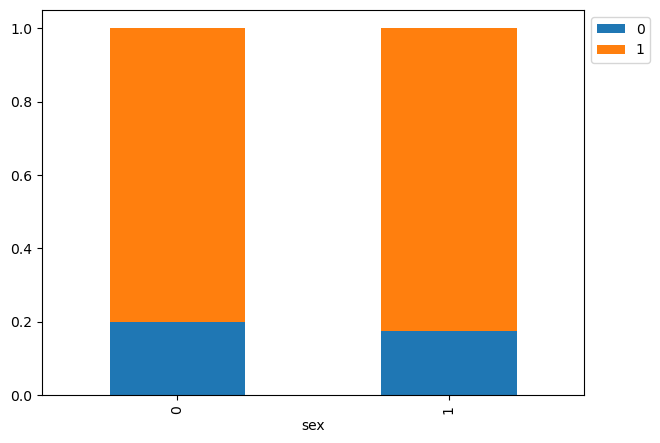

In [90]:
stacked_barplot(df, "sex", "target")

target     0     1   All
cp                      
All     1362  5941  7303
1        480  1378  1858
2        451  1363  1814
3        431  1398  1829
0          0  1802  1802
------------------------------------------------------------------------------------------------------------------------


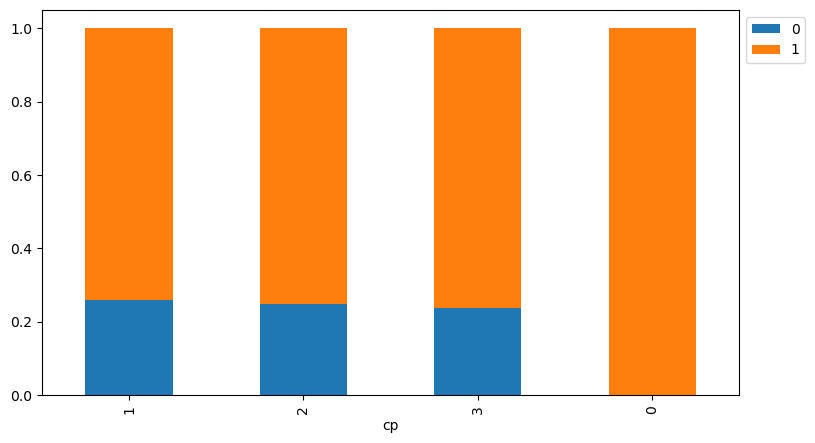

In [92]:
stacked_barplot(df, "cp", "target")

target      0     1   All
restecg                  
All      1362  5941  7303
1         474  1968  2442
2         446  2032  2478
0         442  1941  2383
------------------------------------------------------------------------------------------------------------------------


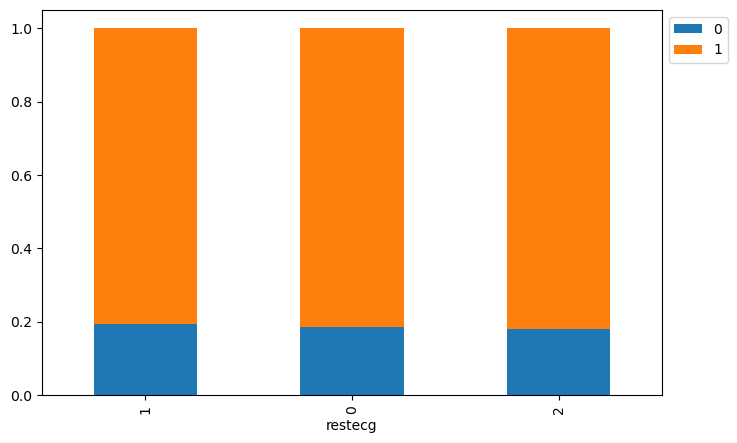

In [96]:
stacked_barplot(df, "restecg", "target")

target     0     1   All
exang                   
0       1362  2266  3628
All     1362  5941  7303
1          0  3675  3675
------------------------------------------------------------------------------------------------------------------------


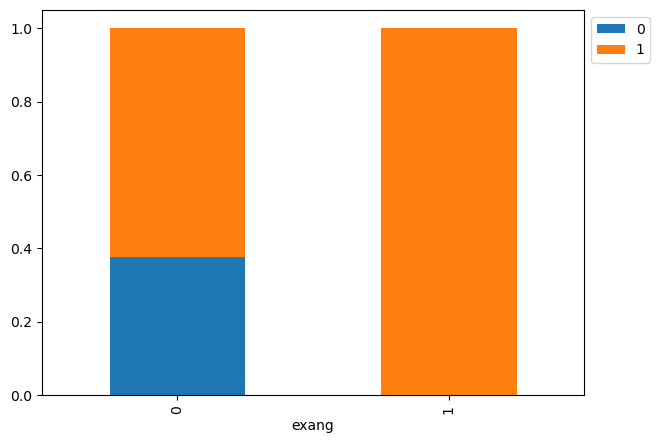

In [98]:
stacked_barplot(df, "exang", "target")

target     0     1   All
slope                   
All     1362  5941  7303
0        464  2006  2470
1        450  1975  2425
2        448  1960  2408
------------------------------------------------------------------------------------------------------------------------


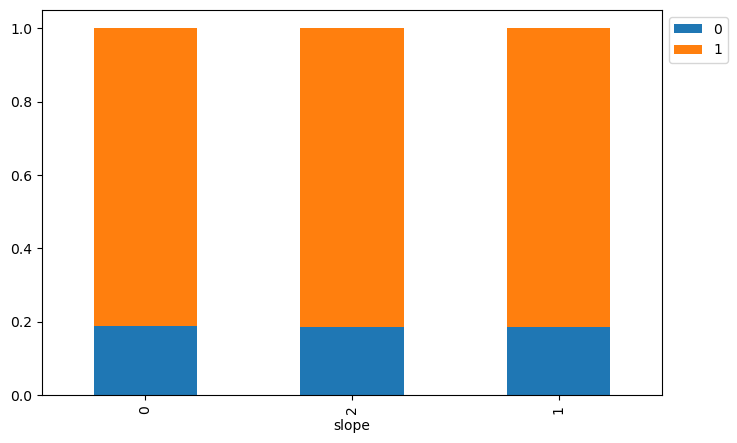

In [100]:
stacked_barplot(df, "slope", "target")

target     0     1   All
ca                      
All     1362  5941  7303
4        281  1207  1488
2        279  1226  1505
1        276  1163  1439
3        275  1173  1448
0        251  1172  1423
------------------------------------------------------------------------------------------------------------------------


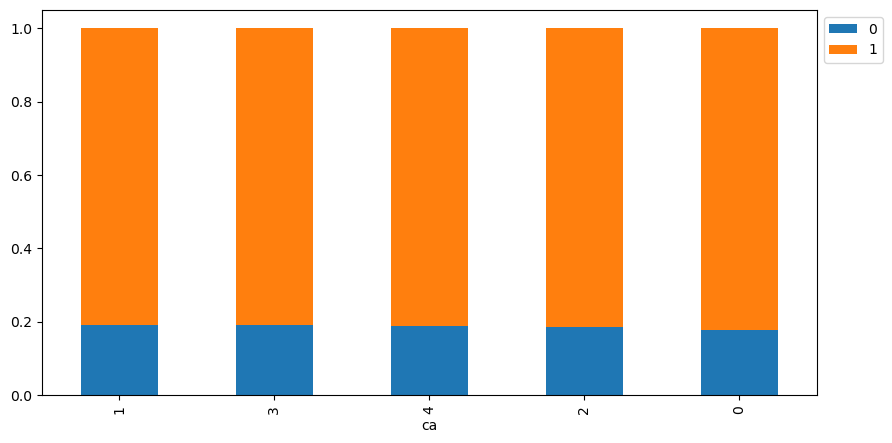

In [102]:
stacked_barplot(df, "ca", "target")

target     0     1   All
thal                    
All     1362  5941  7303
0        355  1434  1789
2        353  1460  1813
3        334  1488  1822
1        320  1559  1879
------------------------------------------------------------------------------------------------------------------------


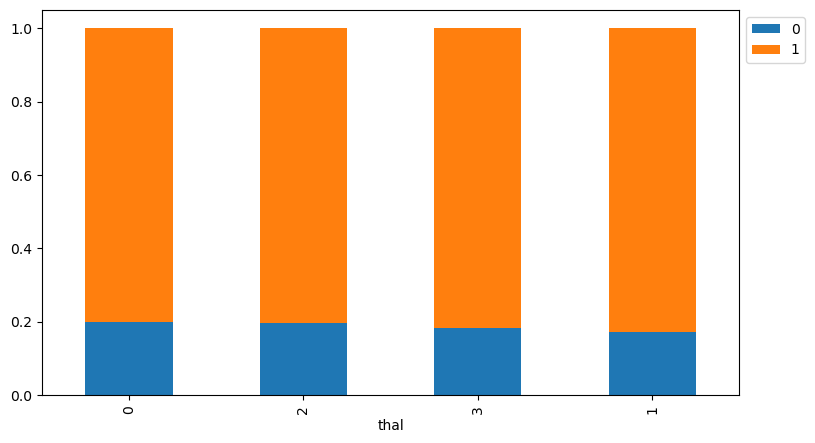

In [104]:
stacked_barplot(df, "thal", "target")

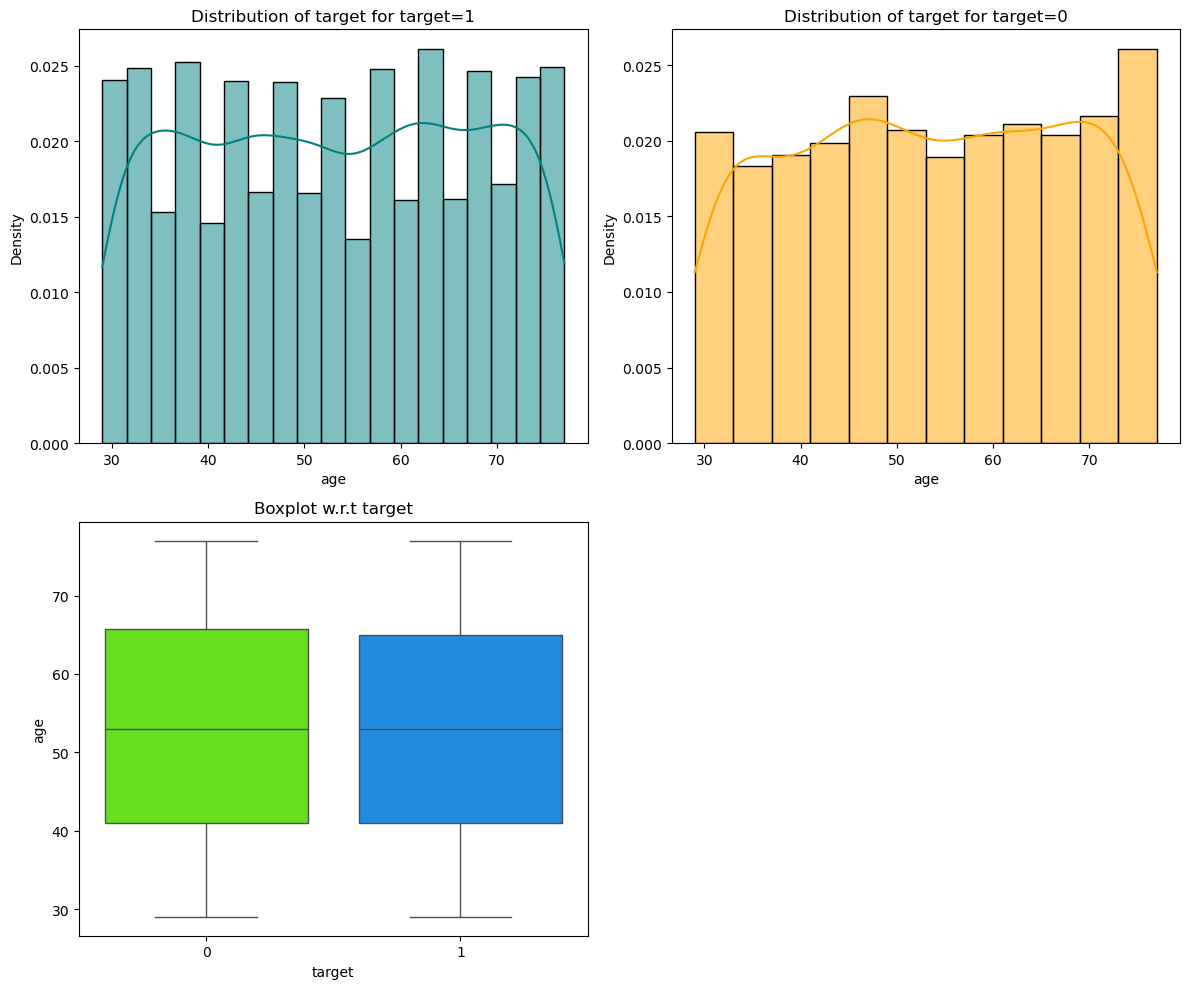

In [186]:
distribution_plot_wrt_target(df, 'age', 'target')

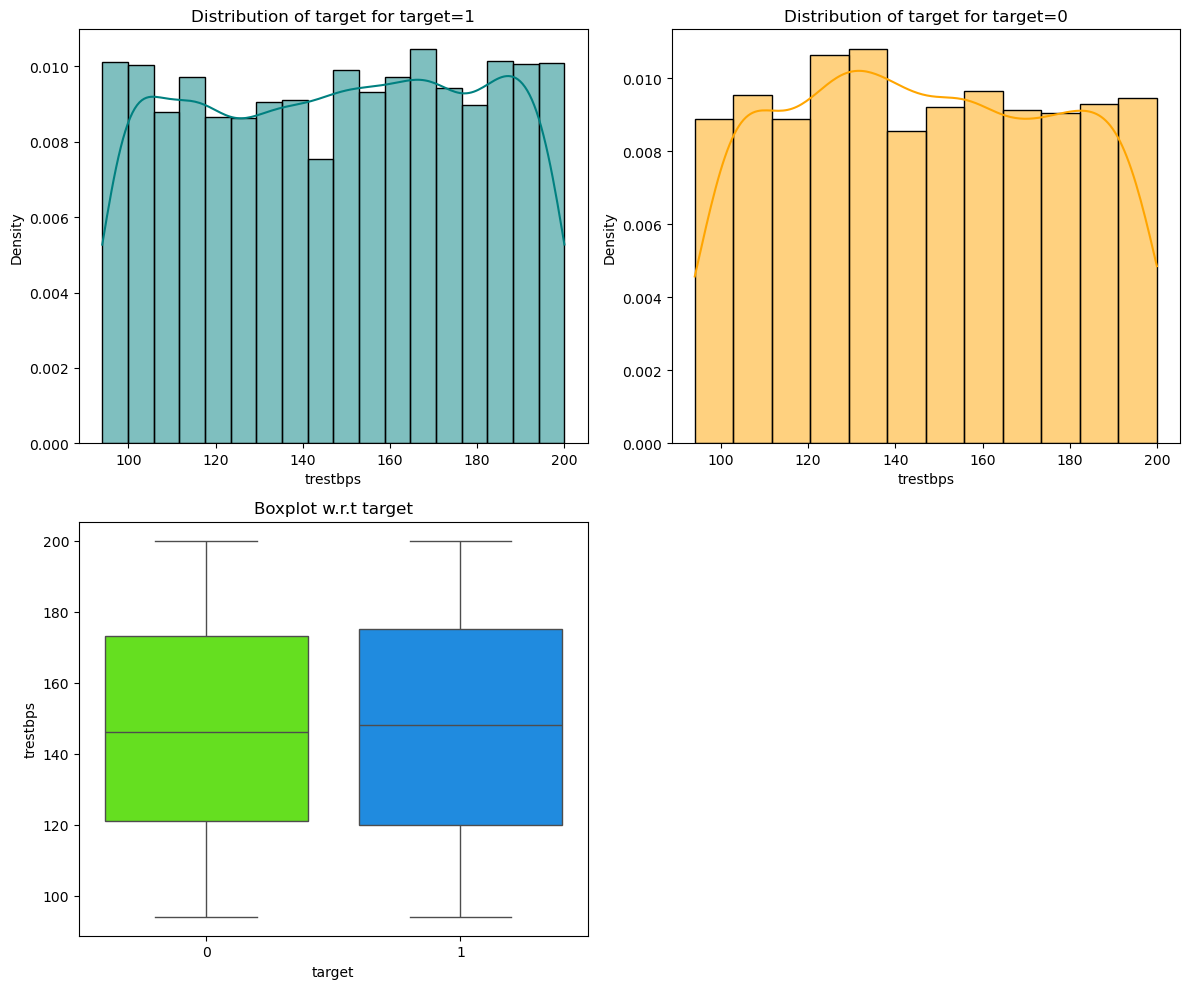

In [188]:
distribution_plot_wrt_target(df, 'trestbps', 'target')

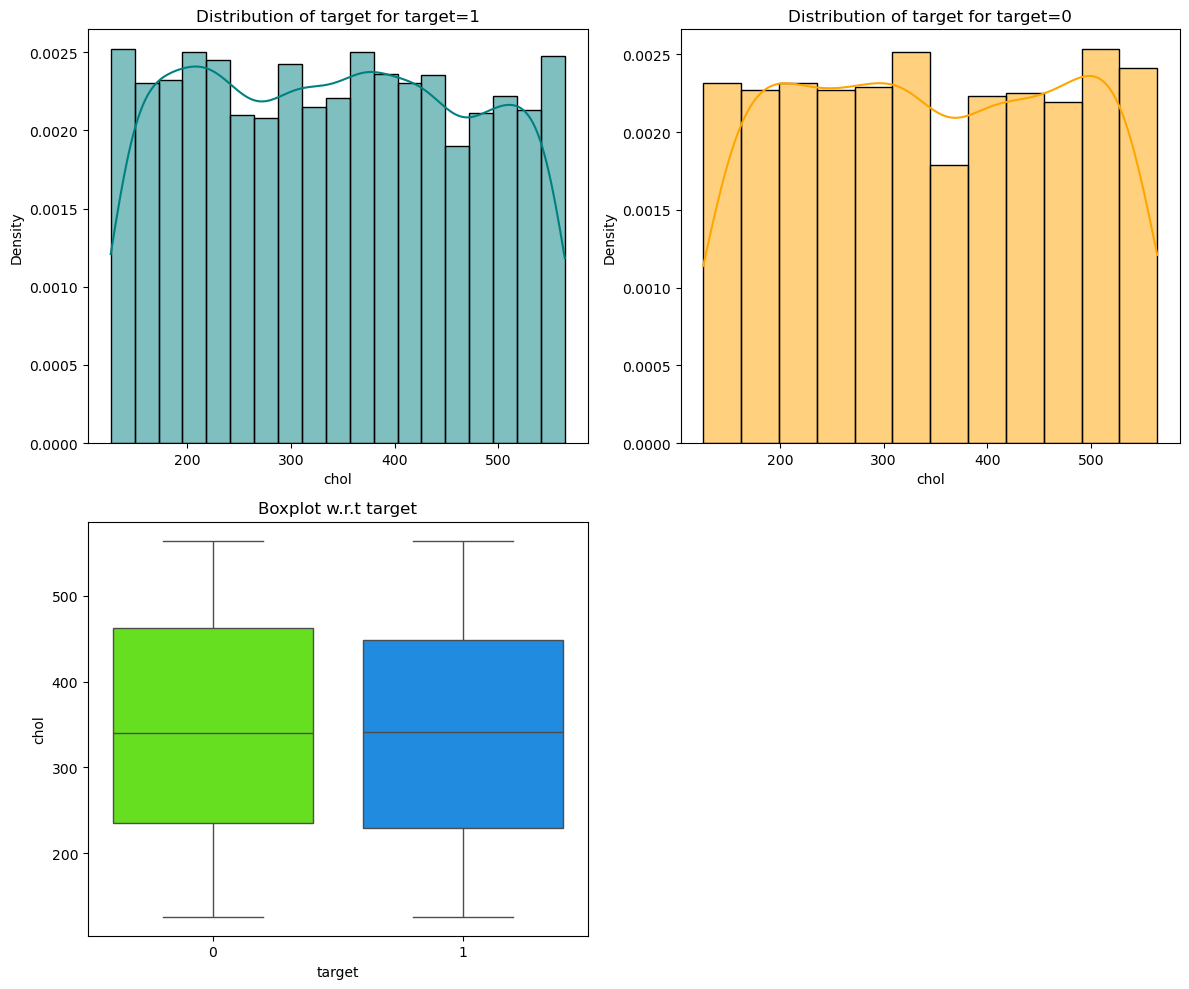

In [190]:
distribution_plot_wrt_target(df, 'chol', 'target')

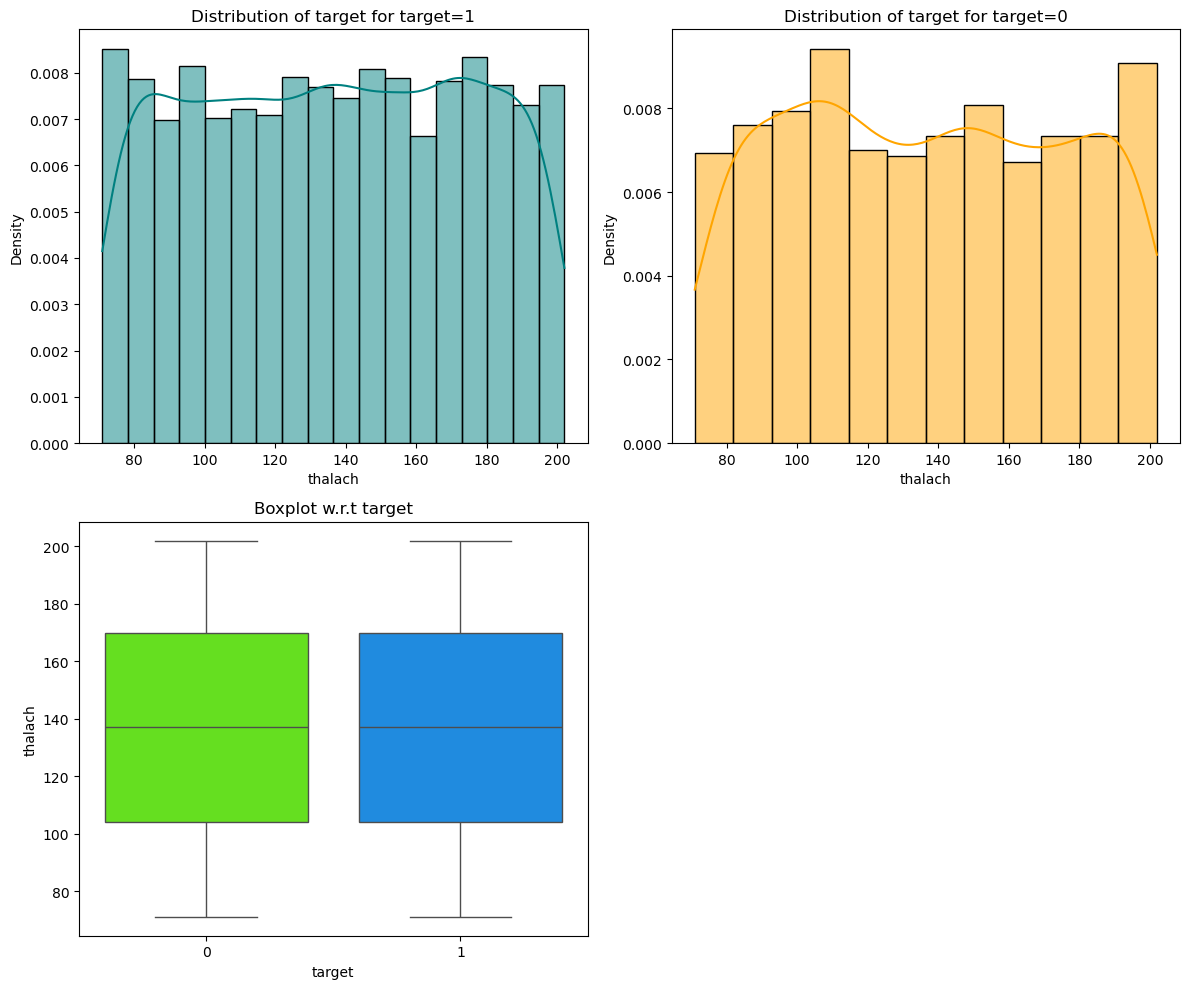

In [192]:
distribution_plot_wrt_target(df, 'thalach', 'target')

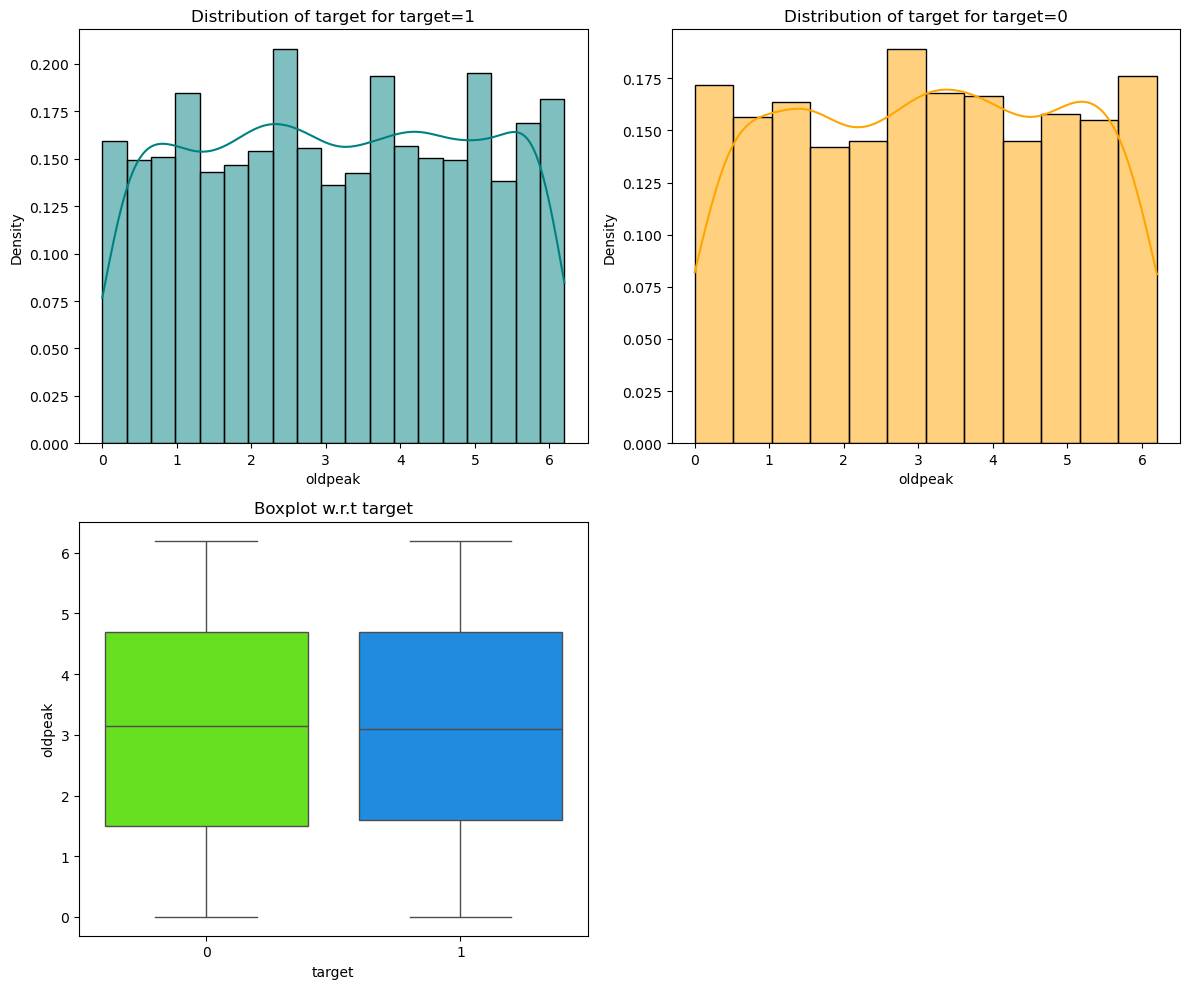

In [194]:
distribution_plot_wrt_target(df, 'oldpeak', 'target')

In [132]:
numerical_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate skewness for each numerical variable
skewness = df[numerical_variables].skew()

# Calculate IQR for each numerical variable
Q1 = df[numerical_variables].quantile(0.25)
Q3 = df[numerical_variables].quantile(0.75)
IQR = Q3 - Q1

# Variable with skewness or IQR outside thresholds are considered to have outliers
outlier_variables = skewness[abs(skewness) > 1]

# Display variables with outliers
print('Variables with outliers: ')
print(outlier_variables)



Variables with outliers: 
Series([], dtype: float64)


In [134]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

test = pd.get_dummies(test, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [136]:
X = df.drop('target', axis=1)
y = df["target"]

In [138]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on predictor variables
X[numerical_variables] = scaler.fit_transform(X[numerical_variables])

test[numerical_variables] = scaler.transform(test[numerical_variables])

In [140]:
ros = RandomOverSampler()
X_resample, y_resample = ros.fit_resample(X, y)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.20, random_state=1, stratify=y_resample)

In [144]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (9505, 22)
Shape of test set :  (2377, 22)
Percentage of classes in training set:
target
0    0.500053
1    0.499947
Name: proportion, dtype: float64
Percentage of classes in test set:
target
1    0.50021
0    0.49979
Name: proportion, dtype: float64


## Define model with functional API

In [149]:
# define input layer
input_layer = tf.keras.Input(shape=(X_train.shape[1],))

hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
drop1 = tf.keras.layers.Dropout(rate=0.40)(hidden_layer1)
hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(drop1)
hidden_layer3 = tf.keras.layers.Dense(16, activation='relu')(hidden_layer2)
hidden_layer4 = tf.keras.layers.Dense(8, activation='relu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(4, activation='relu')(hidden_layer4)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer5)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

## Compile, Fit and Evaluate the model

In [152]:
# define optimizer, loss, and metrics
optimizer = tf.keras.optimizers.RMSprop(0.001)

loss = tf.keras.losses.BinaryCrossentropy()

metrics = ['accuracy']

In [154]:
# define model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# fit model
model.fit(X_train, y_train, epochs=150, verbose=0)

In [156]:
# evaluate model
model.evaluate(X_train, y_train)

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.3001


[0.2993168830871582, 0.8832193613052368]

In [158]:
#evaluate model
model.evaluate(X_test, y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8844 - loss: 0.2993


[0.29673779010772705, 0.8847286701202393]

In [160]:
# Predict using the trained model on test data, excluding 'id'
target = model.predict(test.drop('id', axis=1))

target = target.astype('int')

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [162]:
submission = submission_df.copy()

submission['target'] = target

submission.to_csv('submission.csv', index=False)